In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
null_count = train_data['VRDeck'].isnull().sum() # Summing up all missing values
total_count = train_data.shape[0] # The amount of rows in our data
print(f'{null_count/total_count * 100:.2f}%')

2.16%


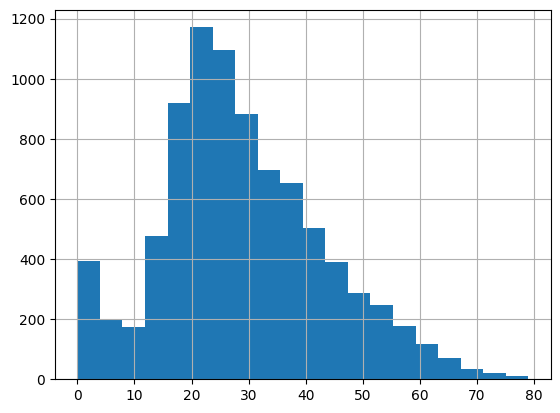

In [5]:
train_data.Age.hist(bins=20)
plt.show();

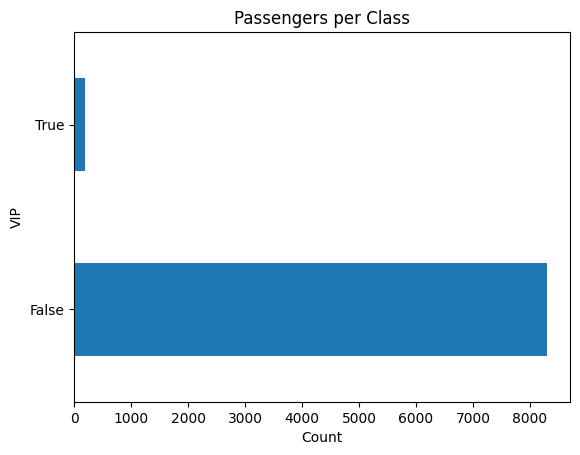

In [6]:
train_data['VIP'].value_counts().plot(kind='barh');
plt.xlabel("Count");
plt.title("Passengers per Class");

In [7]:
under_15 = train_data[train_data['Age'] < 15]
over_15 = train_data[train_data['Age'] >= 15]
percentage_under_15 = (under_15['Transported'].sum() / len(under_15)) * 100
percentage_over_15 = (over_15['Transported'].sum() / len(over_15)) * 100

print(f"Percentage of passengers transported under 40: {percentage_under_15:.2f}%")
print(f"Percentage of passengers transported 40 and older: {percentage_over_15:.2f}%")

Percentage of passengers transported under 40: 65.71%
Percentage of passengers transported 40 and older: 48.12%


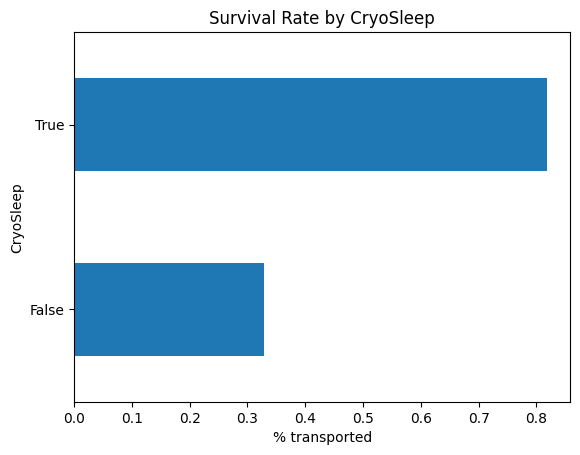

In [8]:
train_data.groupby('CryoSleep').Transported.mean().plot(kind='barh').set_xlabel('% transported');
plt.title('Survival Rate by CryoSleep');

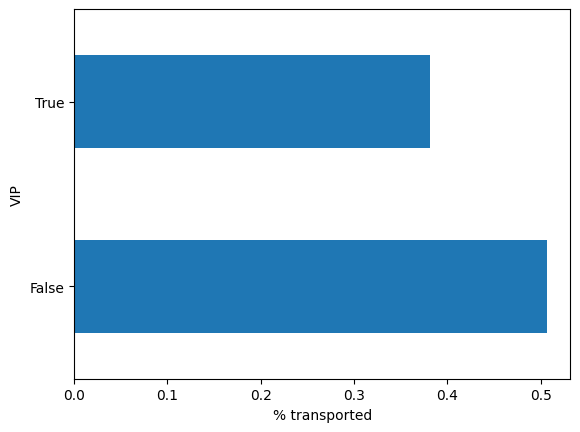

In [9]:
train_data.groupby('VIP').Transported.mean().plot(kind='barh').set_xlabel('% transported');

In [10]:
train_data['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

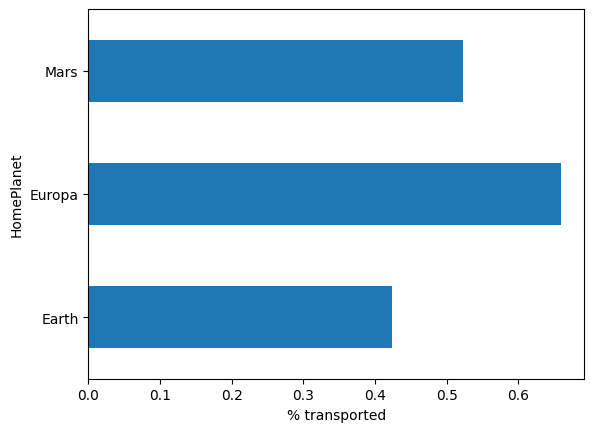

In [11]:
train_data.groupby('HomePlanet').Transported.mean().plot(kind='barh').set_xlabel('% transported');

In [12]:
train_data['Totalspending'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']

In [13]:
train_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Totalspending'],
      dtype='object')

In [14]:
train_data['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

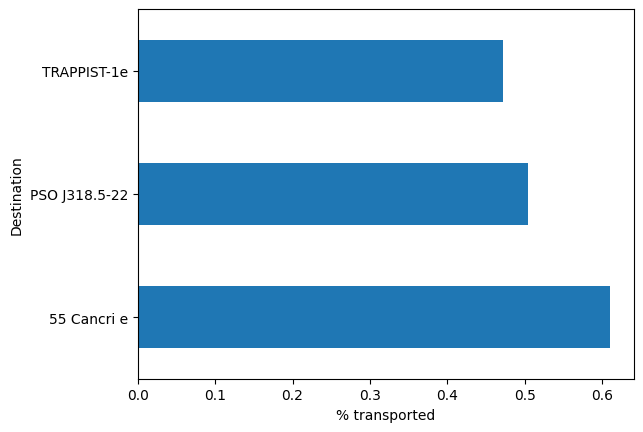

In [15]:
train_data.groupby('Destination').Transported.mean().plot(kind='barh').set_xlabel('% transported');

In [16]:
train_data['Transported'] = train_data['Transported'].astype(int)

In [17]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Define the target variable (what we want to predict)
# We are predicting the "Survived" column from the training data
y = train_data["Transported"]

# Define the feature columns that will be used for prediction
features = ["HomePlanet", "CryoSleep", "Destination", "Age"]

# Use one-hot encoding to convert categorical columns into numerical form
# This is important because most machine learning algorithms require numerical input
X = pd.get_dummies(train_data[features])  # Training features
X_test = pd.get_dummies(test_data[features])  # Test features

# Split the dataset into training and validation sets
# The training set will be used to train the model
# The validation set will be used to evaluate the model's performance
# Setting random_state to a constant ensures reproducibility of the split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

In [18]:
# Import the RandomForestClassifier from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# Import the mean_absolute_error function from scikit-learn
from sklearn.metrics import mean_absolute_error

# Define a function to calculate Mean Absolute Error (MAE) for a Random Forest model
def get_mae(n_estimators, max_depth, random_state, train_X, val_X, train_y, val_y):
    """
    Calculate Mean Absolute Error (MAE) for a Random Forest model.
    
    Parameters:
    - n_estimators: Number of trees in the Random Forest
    - max_depth: Maximum depth of the trees in the Random Forest
    - random_state: Seed used by the random number generator for reproducibility
    - train_X: Training features
    - val_X: Validation features
    - train_y: Training target variable
    - val_y: Validation target variable
    
    Returns:
    - mae: Mean Absolute Error of the model predictions on the validation set
    """
    
    # Initialize the Random Forest model with specified parameters
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    
    # Train the model on the training data
    model.fit(train_X, train_y)
    
    # Make predictions on the validation data
    preds_val = model.predict(val_X)
    
    # Calculate Mean Absolute Error (MAE) between the actual and predicted values
    mae = mean_absolute_error(val_y, preds_val)
    
    # Return the calculated MAE
    return mae

In [19]:
# Import the SimpleImputer from scikit-learn
from sklearn.impute import SimpleImputer

# Initialize the SimpleImputer object
# This object will be used to fill missing values in the dataset
my_imputer = SimpleImputer()

# Fill missing values in the training features and create a new DataFrame
final_X_train = pd.DataFrame(my_imputer.fit_transform(train_X))

# Fill missing values in the validation features using the imputer fitted on the training data
# and create a new DataFrame
final_X_valid = pd.DataFrame(my_imputer.transform(val_X))

In [20]:
# Define lists of hyperparameters to be tested
n_estimators_list = [100, 150, 200]  # Number of trees in the Random Forest
max_depth_list = [6, 7, 8]  # Maximum depth of the trees in the Random Forest
random_state_list = [3, 4, 5]  # Seed used by the random number generator

# Initialize an empty list to store Mean Absolute Error (MAE) for each combination of hyperparameters
mae_list = []

# Loop through each combination of hyperparameters
for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for random_state in random_state_list:
            # Calculate MAE using the get_mae function defined earlier
            mae = get_mae(n_estimators, max_depth, random_state, final_X_train, final_X_valid, train_y, val_y)
            
            # Uncomment the following line to print MAE for each combination of hyperparameters
            # print(f'No. Estimators: {n_estimators} \t Max Depth: {max_depth} \t Mean Absolute Error: {mae}')
            
            # Append the hyperparameters and corresponding MAE to the mae_list
            mae_list.append([n_estimators, max_depth, random_state, mae])

# Find the combination of hyperparameters that resulted in the lowest MAE
best_result = min(mae_list, key=lambda x: x[3])

# Print the best hyperparameters and the corresponding MAE
print(f"No. Estimators: {best_result[0]} \n Max Depth: {best_result[1]} \n Random State: {best_result[2]} Mean Absolute Error: {best_result[3]}")

No. Estimators: 150 
 Max Depth: 7 
 Random State: 4 Mean Absolute Error: 0.26356945722171116


In [21]:
# Define the final Random Forest model using the best hyperparameters identified earlier
model = RandomForestClassifier(n_estimators=best_result[0], max_depth=best_result[1], random_state=best_result[2])

# Train the final Random Forest model using the training data
model.fit(final_X_train, train_y)

# Fill missing values in the test features and create a new DataFrame
final_X_test = pd.DataFrame(my_imputer.fit_transform(X_test))

# Make predictions on the test data using the trained model
predictions = model.predict(final_X_test)

In [22]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions})
output['Transported'] = output['Transported'].astype(bool)
output
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
